In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [4]:
con = sqlite3.connect("C:\\Users\\HP\\Desktop\\ML - DS Projects\\Pass strength\\password_data.sqlite")
data = pd.read_sql_query("SELECT * FROM Users", con)
data.head()

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


Data cleaning 

In [6]:
data.drop(["index"], axis=1, inplace=True)  ## Unnecessary column

In [8]:
data.duplicated().sum()

0

In [10]:
data.isnull().any()
data.dtypes
data["strength"].unique()

array([1, 2, 0], dtype=int64)

Performing data analysis (Semantic analysis)

In [12]:
data[data["password"].str.isnumeric()]

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [14]:
data[data["password"].str.isupper()]

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


In [16]:
data[data["password"].str.isalnum()]

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [18]:
data[data["password"].str.istitle()]

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


In [20]:
# Checking if password contains a special character
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [24]:
data[data["password"].apply(find_semantics) == 1]

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


Feature engineering: 
Considering several factors to determine password strenghth: password length, frequency of lower-, uppercase and special characters

In [26]:
# Considering the lengths of the passwords
data["length"] = data["password"].str.len()

In [28]:
def lowercase_freq(row):
    lowers = [char for char in row if char.islower()]
    return len(lowers) / len(row) 

In [30]:
def uppercase_freq(row):
    uppers = [char for char in row if char.isupper()]
    return len(uppers) / len(row) 

In [32]:
def digits_freq(row):
    digits = [char for char in row if char.isdigit()]
    return len(digits) / len(row) 

In [34]:
data["lowercase_freq"] = np.round(data["password"].apply(lowercase_freq), 3)

In [36]:
data["uppercase_freq"] = np.round(data["password"].apply(uppercase_freq), 3)
data["digits_freq"] = np.round(data["password"].apply(digits_freq), 3)

In [38]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digits_freq
0,zxe870819,1,9,0.333,0.0,0.667
1,xw46454nr23l,1,12,0.417,0.0,0.583
2,soporte13,1,9,0.778,0.0,0.222
3,accounts6000webhost.com,2,23,0.783,0.0,0.174
4,c443balg,1,8,0.625,0.0,0.375


In [40]:
def special_char_freq(row):
    special_chars = []
    for char in row: 
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [42]:
data["special_char_freq"] = np.round(data["password"].apply(special_char_freq), 3)

In [44]:
data["special_char_freq"] = np.round(data["special_char_freq"] / data["length"], 3)

In [46]:
data.head()

,password,strength,length,lowercase_freq,uppercase_freq,digits_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000


In [48]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digits_freq', 'special_char_freq'],
      dtype='object')

In [50]:
data[["strength", "length"]].groupby(["strength"]).agg(["min", "max", "mean", "median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [52]:
cols = ['length', 'uppercase_freq', 'digits_freq',
       'lowercase_freq', 'special_char_freq']

for col in cols:
    print(col)
    print(data[[col, "strength"]].groupby(["strength"]).agg(["min", "max", "mean", "median"]))
    print("--------------------------------------------")

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
--------------------------------------------
uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429
--------------------------------------------
digits_freq
         digits_freq                        
                 min    max      mean median
strength                                    
0                0.0  1.000  0.275383  0.286
1                0.0  0.923  0.360123  0.333
2                0.0  0.895  0.193796  0.188
--------------------------------------------
lowercase_freq
         lowercase_freq 

In [54]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digits_freq', 'special_char_freq'],
      dtype='object')

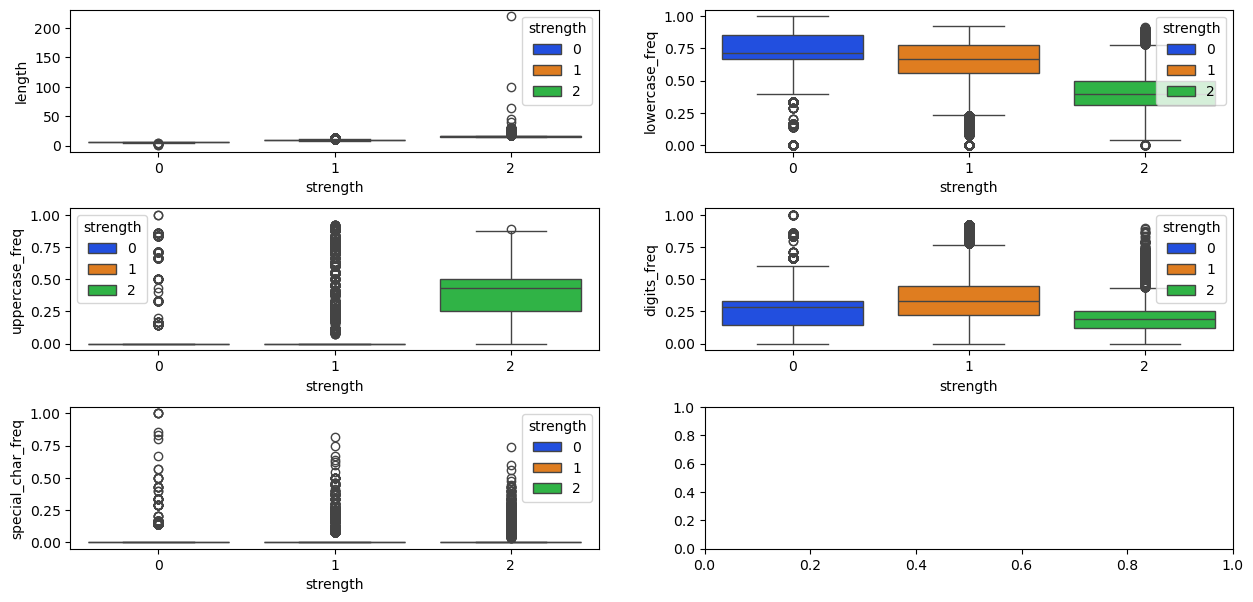

In [56]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 7))   ## subplots of 3x2
sns.boxplot(x="strength", y="length", hue="strength", palette="bright", ax=ax1, data=data)
sns.boxplot(x="strength", y="lowercase_freq", hue="strength", palette="bright", ax=ax2, data=data)
sns.boxplot(x="strength", y="uppercase_freq", hue="strength", palette="bright", ax=ax3, data=data)
sns.boxplot(x="strength", y="digits_freq", hue="strength", palette="bright", ax=ax4, data=data)
sns.boxplot(x="strength", y="special_char_freq", hue="strength", palette="bright", ax=ax5, data=data)

plt.subplots_adjust(hspace=0.4)

In [58]:
data.columns    

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digits_freq', 'special_char_freq'],
      dtype='object')

In [62]:
def get_distrib(data, feature):
    plt.plot(figsize=(10, 8))
    plt.subplot(1,2,1)
    sns.violinplot(x="strength", y=feature, data=data, palette="bright")

    plt.subplot(1,2,2)

    sns.distplot(data[data["strength"]==0][feature], color="red", label="0", hist=False)
    sns.distplot(data[data["strength"]==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data["strength"]==2][feature], color="green", label="2", hist=False)

    plt.legend()
    plt.show()

In [64]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

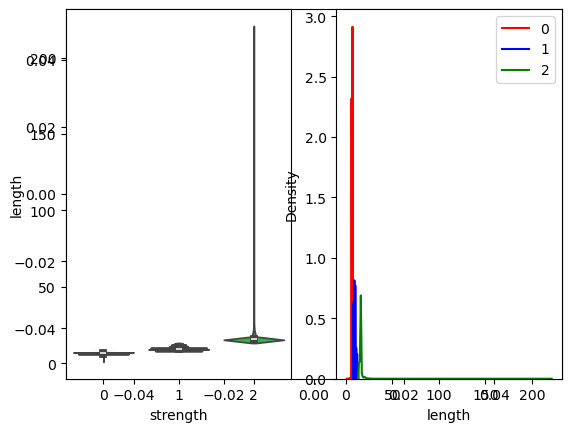

In [66]:
get_distrib(data, "length")

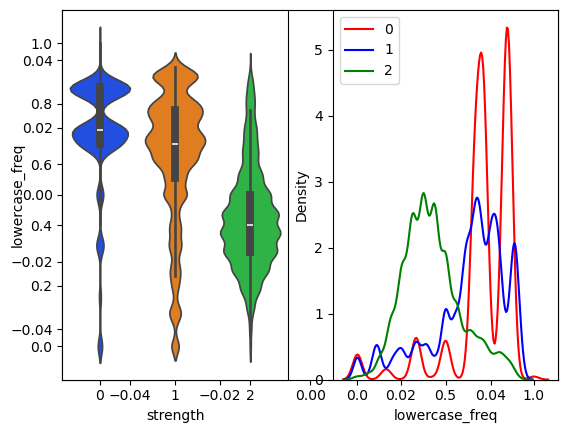

In [68]:
get_distrib(data, "lowercase_freq")

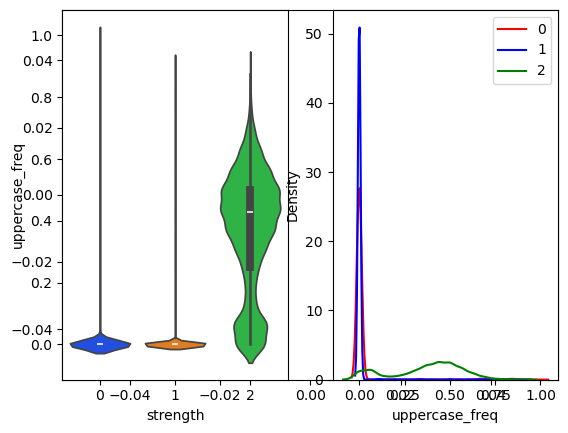

In [70]:
get_distrib(data, "uppercase_freq")

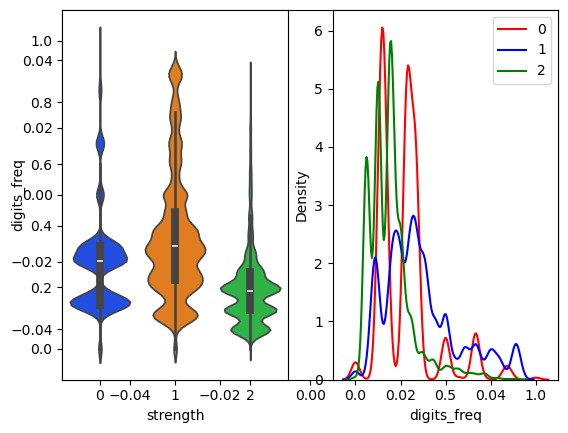

In [72]:
get_distrib(data, "digits_freq")

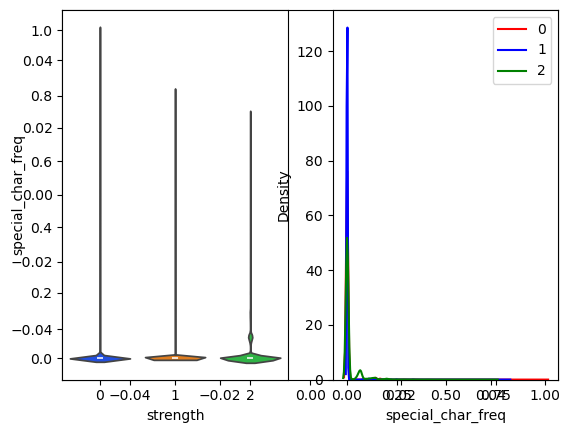

In [74]:
get_distrib(data, "special_char_freq")

In [76]:
df = data.sample(frac=1)   # shuffling

TF-IDF Vectorization. Good choice in this case as it's simple and for passwords we don't need to take into account the semantic meaning of the words, so no need to opt for much complex techiques (BERT, for instance).

In [84]:
vectorizer = TfidfVectorizer(analyzer="char")

In [86]:
x = list(df["password"])

In [88]:
X = vectorizer.fit_transform(x)

In [90]:
X.shape

(100000, 99)

In [92]:
X.toarray()[0]  ## Vector representation of the 1st password

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.62560162, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.35998491, 0.        , 0.32127903,
       0.        , 0.28565707, 0.        , 0.44033719, 0.        ,
       0.31672774, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [96]:
col_names = vectorizer.get_feature_names_out()
col_names

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [98]:
df2 = pd.DataFrame(X.toarray(), columns=col_names)

In [100]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
df2["length"] = df["length"]
df2["lowercase_freq"] = df["lowercase_freq"]
y = df["strength"]

In [104]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.417
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.783
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.700
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.800
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.778
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.667


In [114]:
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2)

In [116]:
X_train.shape, y_train.shape

((80000, 101), (80000,))

In [118]:
final_model = LogisticRegression(multi_class="multinomial")

In [120]:
final_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [122]:
y_pred = final_model.predict(X_test)

In [126]:
Counter(y_pred)

Counter({1: 17116, 2: 1763, 0: 1121})

In [222]:
def predict_password():
    password = input("Please enter a password: ")
    sample_pass = np.array([password])
    pass_matrix = vectorizer.transform(sample_pass)
    pass_length = len(password)
    lowercase_freq = len([char for char in password if char.islower()]) / pass_length
    new_matrix = np.append(pass_matrix.toarray(), (pass_length, lowercase_freq)).reshape(1,101)

    result = final_model.predict(new_matrix)

    if result == "0":
        return "password is weak"
    elif result == "1":
        return "password has medium strength"
    elif result == "2":
        return "password is strong"

In [224]:
predict_password()

Please enter a password:  1234


In [228]:
accuracy_score(y_test, y_pred)

0.79295

In [230]:
confusion_matrix(y_test, y_pred)

array([[  554,  2142,     8],
       [  484, 13948,   398],
       [   83,  1026,  1357]], dtype=int64)

In [232]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.20      0.29      2704
           1       0.81      0.94      0.87     14830
           2       0.77      0.55      0.64      2466

    accuracy                           0.79     20000
   macro avg       0.69      0.57      0.60     20000
weighted avg       0.77      0.79      0.77     20000

